# 0. Importing Necessary Packages

어떻게 했는 지 모르겠는데 base python 3.7.6에서 안되던거 일단 아래 명령어로 해결 _ Kernel Restart 하고 나서 shell 명령 안되는 거 해결

In [1]:
%set_env PATH=/root/anaconda3/bin:/root/anaconda3/condabin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/root/.fzf./bin

env: PATH=/root/anaconda3/bin:/root/anaconda3/condabin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/root/.fzf./bin


In [2]:
# Printing the information of Python, IPython, OS, and the generation date.
%load_ext version_information
%version_information
%matplotlib inline

In [3]:
# Printing the versions of packages
from importlib_metadata import version
for pkg in ['numpy', 'matplotlib', 'astropy', 'pandas']:
    print(pkg+": ver "+version(pkg))

numpy: ver 1.21.5
matplotlib: ver 3.5.1
astropy: ver 5.1
pandas: ver 1.4.2


In [4]:
# matplotlib backend
%matplotlib notebook

# importing necessary modules
import numpy as np
import glob, os
from matplotlib import pyplot as plt
from astropy.io import fits
import pandas as pd
from acstools import acszpt
from reproject import reproject_interp

In [5]:
colnames_cat = ['id', 'RA','Dec', 'x', 'y', 'fwhm', 
'area', 'stel', 'ell', 'theta', 'nf5sig', 'nfobs', 'f435w_mag', 'f435w_magerr',
'f435w_flux', 'f435w_fluxerr', 'f435w_fluxnJy', 'f435w_fluxnJyerr', 'f435w_sig', 'f606w_mag', 'f606w_magerr', 'f606w_flux', 
'f606w_fluxerr' , 'f606w_fluxnJy', 'f606w_fluxnJyerr', 'f606w_sig', 'f814w_mag', 'f814w_magerr', 'f814w_flux', 'f814w_fluxerr', 
'f814w_fluxnJy', 'f814w_fluxnJyerr' , 'f814w_sig' , 'f105w_mag', 'f105w_magerr', 'f105w_flux', 'f105w_fluxerr', 'f105w_fluxnJy', 
'f105w_fluxnJyerr', 'f105w_sig', 'f125w_mag', 'f125w_magerr', 'f125w_flux', 'f125w_fluxerr', 'f125w_fluxnJy', 'f125w_fluxnJyerr', 'f125w_sig', 
'f140w_mag', 'f140w_magerr', 'f140w_flux', 'f140w_fluxerr', 'f140w_fluxnJy', 'f140w_fluxnJyerr', 'f140w_sig', 'f160w_mag', 'f160w_magerr', 'f160w_flux',
'f160w_fluxerr', 'f160w_fluxnJy', 'f160w_fluxnJyerr', 'f160w_sig', 'bright_mag', 'bright_magerr', 'zb', 'zbmin', 'zbmax', 'tb', 'odds', 'chisq', 
'chisq2', 'M0', 'zml', 'tml'] 
colnames = ['x','y','num','mag_auto','merr_auto','mag_iso','merr_iso','mag_iso', 'magerr_iso','kron','backgr','ra','dec',
            'a','b','theta','mu0','flag','fwhm','flxrad','cl']

In [6]:
band = ["F105W", "F160W"]
band_catread = ["f105w", "f160w"]

In [7]:
dat_cat = np.genfromtxt('../1st_TASK_Relics_SMACS/catalog/hlsp_relics_hst_wfc3ir_smacs0723-73_multi_v1_cat.txt', dtype=None, encoding='ascii', names=colnames_cat)
dat_0 = np.genfromtxt( '../1st_TASK_Relics_SMACS/{}.cat'.format(band[0]), dtype=None, encoding='ascii', names=colnames)
dat_1 = np.genfromtxt('../1st_TASK_Relics_SMACS/{}.cat'.format(band[1]), dtype=None, encoding='ascii', names=colnames)

# 0. Galactic Extinction in Magnitudes

## magnitude correction

In [8]:
A_lambda_one = 1.015
A_lambda_two = 0.470 
EBV = 0.1893
exec("Extmag_{} = A_lambda_one * EBV".format(band[0]))
exec("Extmag_{} = A_lambda_two * EBV".format(band[1]))
exec("dat_0['mag_iso'] = dat_0['mag_iso'] - Extmag_{}".format(band[0]))
exec("dat_1['mag_iso'] = dat_1['mag_iso'] - Extmag_{}".format(band[1]))

# 1. Raw-Data Plot

## 1) RA/dec

In [9]:
%matplotlib inline

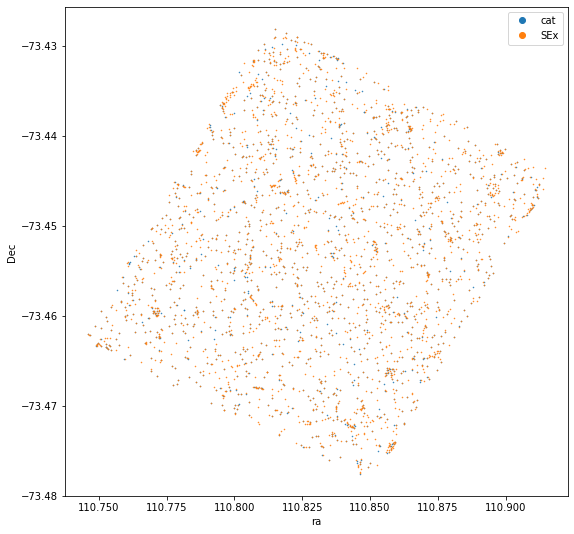

In [15]:
fig, axs = plt.subplots(1, 1, figsize=(9,9))
axs.plot(dat_cat['RA'], dat_cat['Dec'], 'o', ms = 0.5, label = 'cat')
axs.plot(dat_0['ra'], dat_0['dec'], 'o', ms=0.5, label = 'SEx')
axs.set_xlabel("ra")
axs.set_ylabel("Dec")
# change legend markersize
lgnd = axs.legend()
lgnd.legendHandles[0].set_markersize(6)
lgnd.legendHandles[1].set_markersize(6)

## 2) Mag-Magerr Plot

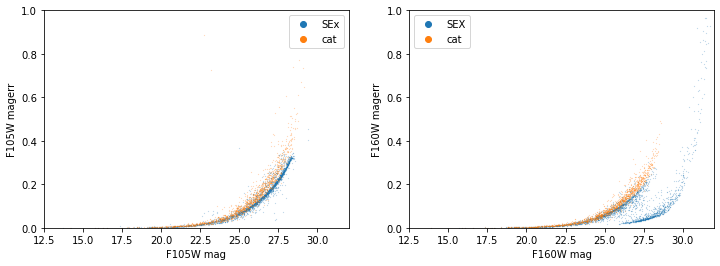

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))
mag_range = (dat_0['mag_iso'] < 99.0)&(dat_1['mag_iso']<99.0)
# magnitude of 99.0 means the source not detected in the 606-band image but detected in the 814-band image.
ax[0].plot(dat_0['mag_iso'][mag_range], dat_0['magerr_iso'][mag_range], 'o', ms=0.1, label='SEx')
ax[0].plot(dat_cat['{}_mag'.format(band_catread[0])], dat_cat['{}_magerr'.format(band_catread[0])], 'o', ms=0.1, label='cat')
ax[0].set_xlim([12.5, 32])
ax[0].set_ylim([0.0, 1.0])
ax[0].set_xlabel('{} mag'.format(band[0]))
ax[0].set_ylabel('{} magerr'.format(band[0]))


ax[1].plot(dat_1['mag_iso'][mag_range], dat_1['magerr_iso'][mag_range], 'o', ms=0.1, label='SEX')
ax[1].plot(dat_cat['{}_mag'.format(band_catread[1])], dat_cat['{}_magerr'.format(band_catread[1])], 'o', ms=0.1, label='cat')
ax[1].set_xlim([12.5, 32])
ax[1].set_ylim([0, 1])
ax[1].set_xlabel('{} mag'.format(band[1]))
ax[1].set_ylabel('{} magerr'.format(band[1]))

#=================================================================
lgnd0 = ax[0].legend()
lgnd0.legendHandles[0].set_markersize(6)
lgnd0.legendHandles[1].set_markersize(6)
lgnd1 = ax[1].legend()
lgnd1.legendHandles[0].set_markersize(6)
lgnd1.legendHandles[1].set_markersize(6)

## 3) Magnitude - stellarity (``CLASS_STAR``) digram

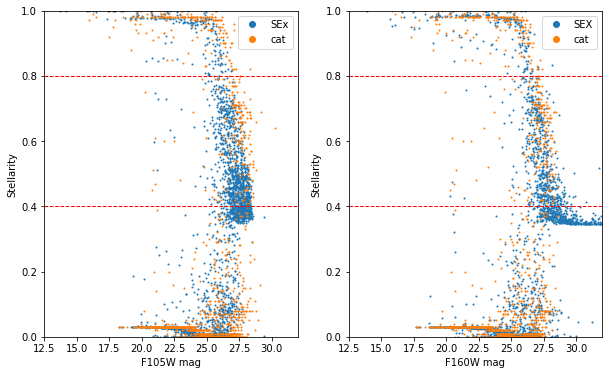

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(10,6))
mag_range = (dat_0['mag_iso'] < 99.0)&(dat_1['mag_iso']<99.0)
# magnitude of 99.0 means the source not detected in the 606-band image but detected in the 814-band image.
ax[0].plot(dat_0['mag_iso'][mag_range], dat_0['cl'][mag_range], 'o', ms=1, label='SEx')
ax[0].plot(dat_cat['{}_mag'.format(band_catread[0])], dat_cat['stel'], 'o', ms=1, label='cat')
ax[0].set_xlim([12.5, 32])
ax[0].set_ylim([0.0, 1.0])
ax[0].set_xlabel('{} mag'.format(band[0]))
ax[0].set_ylabel('Stellarity')
ax[0].axhline(0.4, 0, 1, color='red', ls='--', lw=1)
ax[0].axhline(0.8, 0, 1, color='red', ls='--', lw=1)


ax[1].plot(dat_1['mag_iso'][mag_range], dat_1['cl'][mag_range], 'o', ms=1, label='SEX')
ax[1].plot(dat_cat['{}_mag'.format(band_catread[1])], dat_cat['stel'], 'o', ms=1, label='cat')
ax[1].set_xlim([12.5, 32])
ax[1].set_ylim([0, 1])
ax[1].set_xlabel('{} mag'.format(band[1]))
ax[1].set_ylabel('Stellarity')
ax[1].axhline(0.4, 0, 1, color='red', ls='--', lw=1)
ax[1].axhline(0.8, 0, 1, color='red', ls='--', lw=1)

#=================================================================
lgnd0 = ax[0].legend()
lgnd0.legendHandles[0].set_markersize(6)
lgnd0.legendHandles[1].set_markersize(6)
lgnd1 = ax[1].legend()
lgnd1.legendHandles[0].set_markersize(6)
lgnd1.legendHandles[1].set_markersize(6)

## 4) CMD

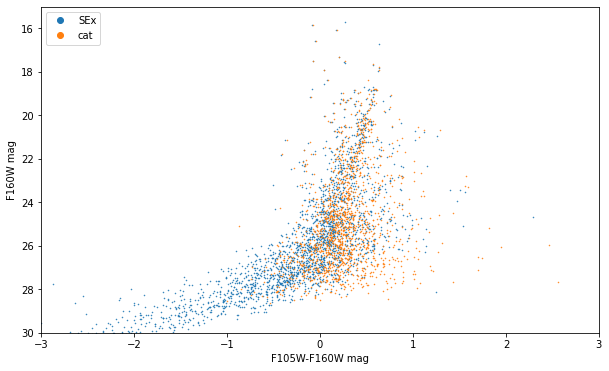

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
galcnd = (dat_0['mag_iso'] < 99.0)&(dat_1['mag_iso']<99.0) #&(dat_0['flxrad'] > 4.) & (dat_0['fwhm'] > 4.) & (dat_1['fwhm'] > 4.) & (dat_1['merr'] < 0.5) & (dat_0['merr'] < 0.5)&(dat_1['cl'] < 0.4)


# magnitude of 99.0 means the source not detected in the 606-band image but detected in the 814-band image.
ax.plot(dat_0['mag_iso'][galcnd]-dat_1['mag_iso'][galcnd], dat_1['mag_iso'][galcnd], 'o', ms=0.5, label='SEx')
ax.plot(dat_cat['{}_mag'.format(band_catread[0])]-dat_cat['{}_mag'.format(band_catread[1])], dat_cat['{}_mag'.format(band_catread[1])], 'o', ms=0.5, label='cat')
ax.set_xlim([-3, 3])
ax.set_ylim([30, 15])
ax.set_xlabel('{}-{} mag'.format(band[0], band[1]))
ax.set_ylabel('{} mag'.format(band[1]))

#=================================================================
lgnd0 = ax.legend()
lgnd0.legendHandles[0].set_markersize(6)
lgnd0.legendHandles[1].set_markersize(6)

# 2. Catalog - Sextractor Matching

In [19]:
#정환 선배님이 도와주신 Matching Code
from email.utils import decode_rfc2231
from astropy.coordinates import SkyCoord
from astropy.coordinates import match_coordinates_sky
from astropy import units as u

ra_s, dec_s = dat_0['ra'], dat_0['dec']
ra_c, dec_c = dat_cat['RA'], dat_cat['Dec']

tol = 0.1 / 3600.0    # tolerance (0.5 arcsec)
src = SkyCoord(ra=ra_s*u.degree, dec=dec_s*u.degree)    # coordinates from SExtractor
cat = SkyCoord(ra=ra_c*u.degree, dec=dec_c*u.degree)    # coordinates from catalogs
idx, sep2d, dist3d = match_coordinates_sky(src, cat, nthneighbor=1, storekdtree='kdtree_sky')    # 매칭 함수 실행

matched = sep2d.value < tol    # 매칭 조건 적용
n_mch = np.sum(matched)    # 매칭된 개수
idx_cat = idx[matched]    # cat의 매칭된 인덱스
idx_src = np.where(matched)[0]    # src의 매칭된 인덱스


In [20]:
# 클래스로 다시 재작성한 간편 매칭 코드 
class matchingsexcat:
    def __init__(self, dat_sex, dat_catalog):  # def __init__(self, dat_sex, dat_catalog, tolerance)
        tol = 0.05 / 3600 # tol = tolerance / 3600
        ra_s, dec_s = dat_sex['ra'], dat_sex['dec']
        ra_c, dec_c = dat_catalog['RA'], dat_catalog['Dec']
        src = SkyCoord(ra=ra_s*u.degree, dec=dec_s*u.degree)    # coordinates from SExtractor
        cat = SkyCoord(ra=ra_c*u.degree, dec=dec_c*u.degree)    # coordinates from catalogs
        idx, sep2d, dist3d = match_coordinates_sky(src, cat, nthneighbor=1, storekdtree='kdtree_sky')    # 매칭 함수 실행

        matched = sep2d.value < tol    # 매칭 조건 적용
        self.n_mch = np.sum(matched)    # 매칭된 개수
        self.idx_cat = idx[matched]    # cat의 매칭된 인덱스
        self.idx_src = np.where(matched)[0]    # src의 매칭된 인덱스

    def matchedsex(self, dat_sex):
        return dat_sex[self.idx_src]

    def matchedsex_index(self):
        return self.idx_src

    def matchedcat(self, dat_catalog):
        return dat_catalog[self.idx_cat]

    def matchedcat_index(self):
        return self.idx_cat

    def matchedsize(self):
        return self.n_mch


## 1) Plot of Matched Source and Detected Source

" # one-time \nfig, ax = plt.subplots(1, 1, figsize=(7, 7))\nax.plot(b11_ra, b11_dec, 'o', ms=1, label = 'SEx-matched')\nax.plot(b12_ra, b12_dec, 'o', ms=1, label = 'cat-matched')\nlgnd0 = ax.legend()\nlgnd0.legendHandles[0].set_markersize(6)\nlgnd0.legendHandles[1].set_markersize(6)\n"

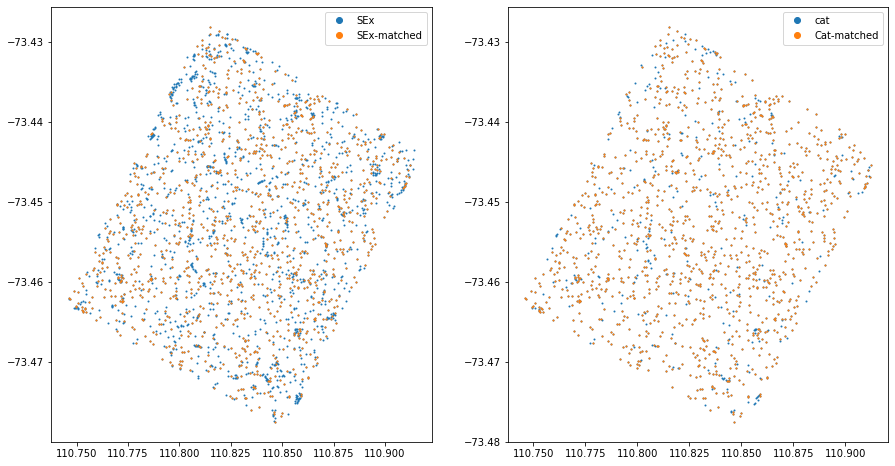

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(15,8))
ax[0].plot(dat_0['ra'], dat_0['dec'], 'o', ms=1, label = 'SEx')
ax[0].plot(dat_0[idx_src]['ra'], dat_0[idx_src]['dec'], 'o', ms=1, label='SEx-matched')
ax[1].plot(dat_cat['RA'], dat_cat['Dec'], 'o', ms=1, label='cat')
ax[1].plot(dat_cat[idx_cat]['RA'], dat_cat[idx_cat]['Dec'], 'o', ms=1, label='Cat-matched')

lgnd0 = ax[0].legend()
lgnd0.legendHandles[0].set_markersize(6)
lgnd0.legendHandles[1].set_markersize(6)

lgnd1 = ax[1].legend()
lgnd1.legendHandles[0].set_markersize(6)
lgnd1.legendHandles[1].set_markersize(6)


''' # one-time 
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
ax.plot(b11_ra, b11_dec, 'o', ms=1, label = 'SEx-matched')
ax.plot(b12_ra, b12_dec, 'o', ms=1, label = 'cat-matched')
lgnd0 = ax.legend()
lgnd0.legendHandles[0].set_markersize(6)
lgnd0.legendHandles[1].set_markersize(6)
'''


## 2) Drawing Plot Again with Matching INDEX

In [22]:
print(np.size(dat_0))
print(np.size(idx_src))

2483
1201


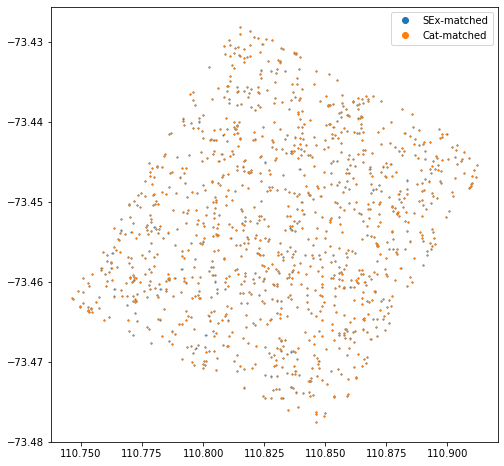

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.plot(dat_0[idx_src]['ra'], dat_0[idx_src]['dec'], 'o', ms=1, label='SEx-matched')
ax.plot(dat_cat[idx_cat]['RA'], dat_cat[idx_cat]['Dec'], 'o', ms=1, label='Cat-matched')


lgnd0 = ax.legend()
lgnd0.legendHandles[0].set_markersize(6)
lgnd0.legendHandles[1].set_markersize(6)

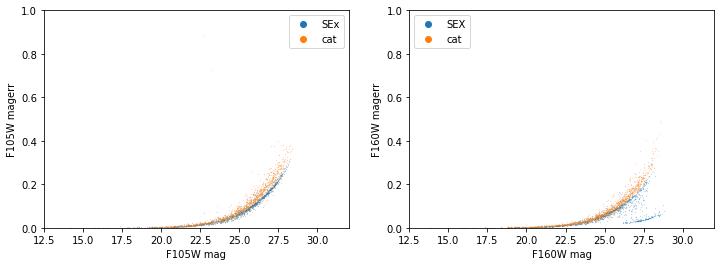

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))
# magnitude of 99.0 means the source not detected in the 606-band image but detected in the 814-band image.
ax[0].plot(dat_0[idx_src]['mag_iso'], dat_0[idx_src]['magerr_iso'], 'o', ms=0.1, label='SEx')
ax[0].plot(dat_cat[idx_cat]['{}_mag'.format(band_catread[0])], dat_cat[idx_cat]['{}_magerr'.format(band_catread[0])], 'o', ms=0.1, label='cat')
ax[0].set_xlim([12.5, 32])
ax[0].set_ylim([0.0, 1.0])
ax[0].set_xlabel('{} mag'.format(band[0]))
ax[0].set_ylabel('{} magerr'.format(band[0]))


ax[1].plot(dat_1[idx_src]['mag_iso'], dat_1[idx_src]['magerr_iso'], 'o', ms=0.1, label='SEX')
ax[1].plot(dat_cat[idx_cat]['{}_mag'.format(band_catread[1])], dat_cat[idx_cat]['{}_magerr'.format(band_catread[1])], 'o', ms=0.1, label='cat')
ax[1].set_xlim([12.5, 32])
ax[1].set_ylim([0, 1])
ax[1].set_xlabel('{} mag'.format(band[1]))
ax[1].set_ylabel('{} magerr'.format(band[1]))

#=================================================================
lgnd0 = ax[0].legend()
lgnd0.legendHandles[0].set_markersize(6)
lgnd0.legendHandles[1].set_markersize(6)
lgnd1 = ax[1].legend()
lgnd1.legendHandles[0].set_markersize(6)
lgnd1.legendHandles[1].set_markersize(6)

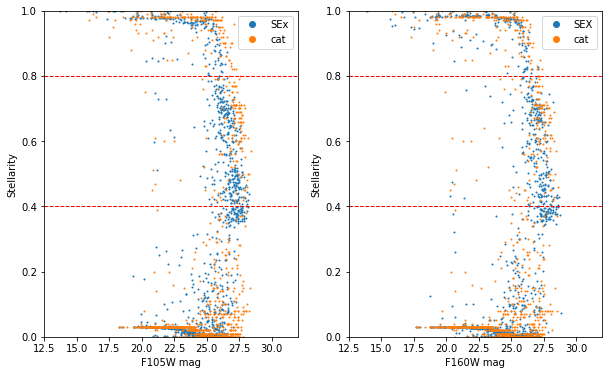

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(10,6))
# magnitude of 99.0 means the source not detected in the 606-band image but detected in the 814-band image.
ax[0].plot(dat_0[idx_src]['mag_iso'], dat_0[idx_src]['cl'], 'o', ms=1, label='SEx')
ax[0].plot(dat_cat[idx_cat]['{}_mag'.format(band_catread[0])], dat_cat[idx_cat]['stel'], 'o', ms=1, label='cat')
ax[0].set_xlim([12.5, 32])
ax[0].set_ylim([0.0, 1.0])
ax[0].set_xlabel('{} mag'.format(band[0]))
ax[0].set_ylabel('Stellarity')
ax[0].axhline(0.4, 0, 1, color='red', ls='--', lw=1)
ax[0].axhline(0.8, 0, 1, color='red', ls='--', lw=1)


ax[1].plot(dat_1[idx_src]['mag_iso'], dat_1[idx_src]['cl'], 'o', ms=1, label='SEX')
ax[1].plot(dat_cat[idx_cat]['{}_mag'.format(band_catread[1])], dat_cat[idx_cat]['stel'], 'o', ms=1, label='cat')
ax[1].set_xlim([12.5, 32])
ax[1].set_ylim([0, 1])
ax[1].set_xlabel('{} mag'.format(band[1]))
ax[1].set_ylabel('Stellarity')
ax[1].axhline(0.4, 0, 1, color='red', ls='--', lw=1)
ax[1].axhline(0.8, 0, 1, color='red', ls='--', lw=1)

#=================================================================
lgnd0 = ax[0].legend()
lgnd0.legendHandles[0].set_markersize(6)
lgnd0.legendHandles[1].set_markersize(6)
lgnd1 = ax[1].legend()
lgnd1.legendHandles[0].set_markersize(6)
lgnd1.legendHandles[1].set_markersize(6)

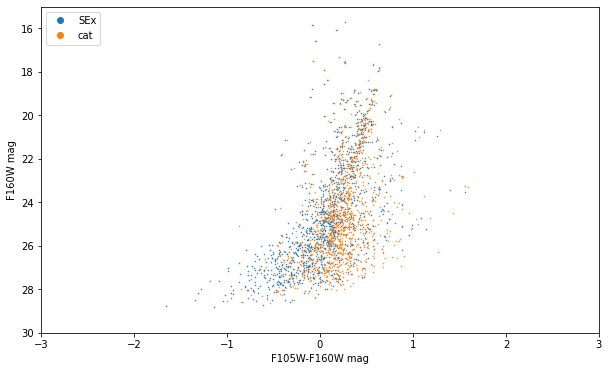

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
# galcnd = (dat_0['mag_iso'] < 99.0)&(dat_1['mag_iso']<99.0) #&(dat_0['flxrad'] > 4.) & (dat_0['fwhm'] > 4.) & (dat_1['fwhm'] > 4.) & (dat_1['merr'] < 0.5) & (dat_0['merr'] < 0.5)&(dat_1['cl'] < 0.4)


# magnitude of 99.0 means the source not detected in the 606-band image but detected in the 814-band image.
ax.plot(dat_0[idx_src]['mag_iso']-dat_1[idx_src]['mag_iso'], dat_1[idx_src]['mag_iso'], 'o', ms=0.5, label='SEx')
ax.plot(dat_cat[idx_cat]['{}_mag'.format(band_catread[0])]-dat_cat[idx_cat]['{}_mag'.format(band_catread[1])], dat_cat[idx_cat]['{}_mag'.format(band_catread[1])], 'o', ms=0.5, label='cat')
ax.set_xlim([-3, 3])
ax.set_ylim([30, 15])
ax.set_xlabel('{}-{} mag'.format(band[0],band[1]))
ax.set_ylabel('{} mag'.format(band[1]))

#=================================================================
lgnd0 = ax.legend()
lgnd0.legendHandles[0].set_markersize(6)
lgnd0.legendHandles[1].set_markersize(6)

CMD with Stellarity filter

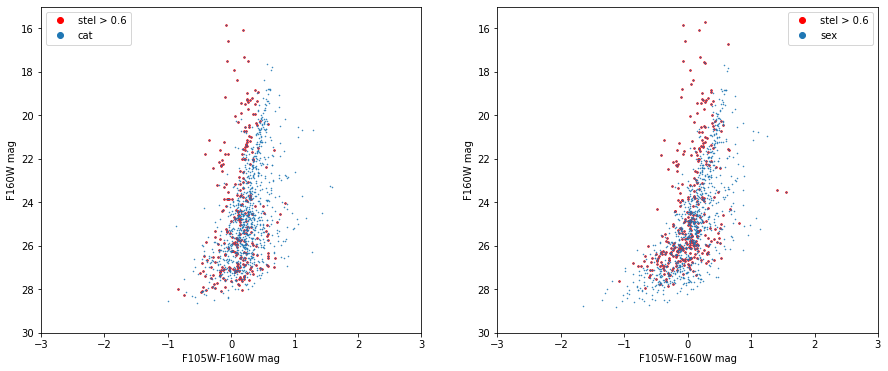

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(15,6))

a_Dat_cat = dat_cat[idx_cat]['{}_mag'.format(band_catread[0])]
b_Dat_cat = dat_cat[idx_cat]['{}_mag'.format(band_catread[1])]
a_Dat_sex = dat_0[idx_src]['mag_iso']
b_Dat_sex = dat_1[idx_src]['mag_iso']


stelf_cat = dat_cat[idx_cat]['stel']>0.6
stelf_sex = dat_0[idx_src]['cl']>0.6
# magnitude of 99.0 means the source not detected in the 606-band image but detected in the 814-band image.
ax[0].plot(a_Dat_cat[stelf_cat] - b_Dat_cat[stelf_cat], b_Dat_cat[stelf_cat], 'o', ms=1.5, color='red', label='stel > 0.6')
ax[0].plot(a_Dat_cat-b_Dat_cat, b_Dat_cat, 'o', ms=0.5, label='cat')

ax[1].plot(a_Dat_sex[stelf_sex] - b_Dat_sex[stelf_sex], b_Dat_sex[stelf_sex], 'o', ms=1.5, color='red', label='stel > 0.6')
ax[1].plot(a_Dat_sex-b_Dat_sex, b_Dat_sex, 'o', ms=0.5, label='sex')

ax[0].set_xlim([-3, 3])
ax[0].set_ylim([30, 15])
ax[0].set_xlabel('{}-{} mag'.format(band[0],band[1]))
ax[0].set_ylabel('{} mag'.format(band[1]))

ax[1].set_xlim([-3, 3])
ax[1].set_ylim([30, 15])
ax[1].set_xlabel('{}-{} mag'.format(band[0],band[1]))
ax[1].set_ylabel('{} mag'.format(band[1]))

#=================================================================
lgnd0 = ax[0].legend()
lgnd0.legendHandles[0].set_markersize(6)
lgnd0.legendHandles[1].set_markersize(6)
lgnd1 = ax[1].legend()
lgnd1.legendHandles[0].set_markersize(6)
lgnd1.legendHandles[1].set_markersize(6)

Outlier 특성 알아보기

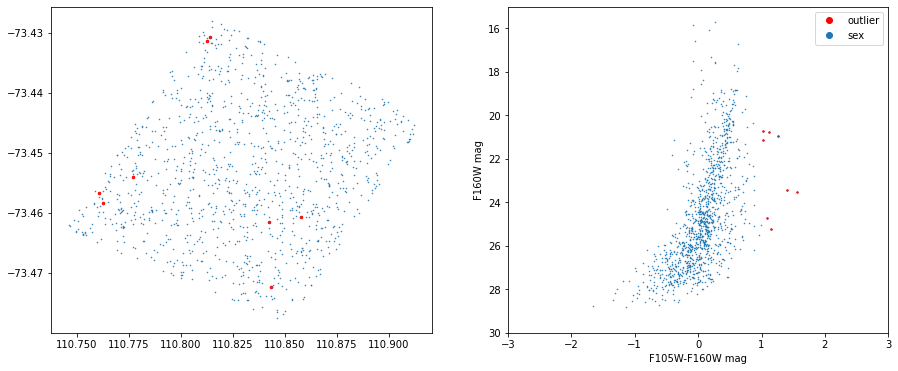

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(15,6))
# galcnd = (dat_0[idx_src]['mag_iso'] < 99.0)&(dat_1['mag_iso']<99.0) #&(dat_0[idx_src]['flxrad'] > 4.) & (dat_0[idx_src]['fwhm'] > 4.) & (dat_1['fwhm'] > 4.) & (dat_1['merr'] < 0.5) & (dat_0[idx_src]['merr'] < 0.5)&(dat_1['cl'[idx_src]] < 0.4)

a_Dat_cat = dat_cat[idx_cat]['{}_mag'.format(band_catread[0])]
b_Dat_cat = dat_cat[idx_cat]['{}_mag'.format(band_catread[1])]
a_Dat_sex = dat_0[idx_src]['mag_iso']
b_Dat_sex = dat_1[idx_src]['mag_iso']

a_Dat_sex2_ra = dat_0[idx_src]['ra']
b_Dat_sex3_ra= dat_1[idx_src]['ra']
a_Dat_sex2_dec = dat_0[idx_src]['dec']
b_Dat_sex3_dec= dat_1[idx_src]['dec']

stelf_sex = a_Dat_sex-b_Dat_sex > 1.0
# magnitude of 99.0 means the source not detected in the 606-band image but detected in the 814-band image.
# ax[0].plot(a_Dat_cat[stelf_cat] - b_Dat_cat[stelf_cat], b_Dat_cat[stelf_cat], 'o', ms=1.5, color='red', label='stel > 0.6')
ax[0].plot(a_Dat_sex2_ra[stelf_sex], a_Dat_sex2_dec[stelf_sex], 'o', ms=2.5, label='outlier', color='red')
ax[0].plot(a_Dat_sex2_ra, a_Dat_sex2_dec, 'o', ms=0.5, label='cat')

ax[1].plot(a_Dat_sex[stelf_sex] - b_Dat_sex[stelf_sex], b_Dat_sex[stelf_sex], 'o', ms=1.5, color='red', label='outlier')
ax[1].plot(a_Dat_sex-b_Dat_sex, b_Dat_sex, 'o', ms=0.5, label='sex')


ax[1].set_xlim([-3, 3])
ax[1].set_ylim([30, 15])
ax[1].set_xlabel('{}-{} mag'.format(band[0],band[1]))
ax[1].set_ylabel('{} mag'.format(band[1]))

#=================================================================

lgnd1 = ax[1].legend()
lgnd1.legendHandles[0].set_markersize(6)
lgnd1.legendHandles[1].set_markersize(6)

## 3) Error Estimation / Parameter Estimation

### (1) Matching Magnitude - Reference Magnitude Error --> thresh problem ? or zp? 


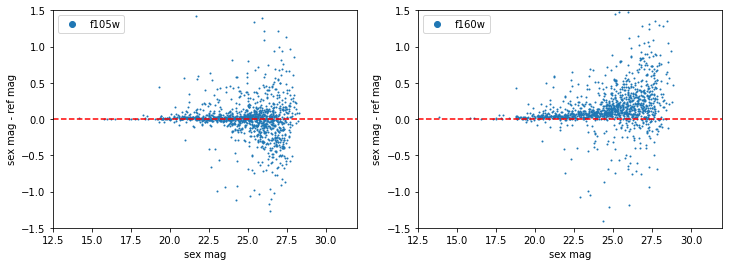

In [29]:

fig, ax = plt.subplots(1, 2, figsize=(12,4))
# magnitude of 99.0 means the source not detected in the 606-band image but detected in the 814-band image.
ax[0].plot(dat_0[idx_src]['mag_iso'], dat_0[idx_src]['mag_iso']-dat_cat[idx_cat]['f105w_mag'], 'o', ms=1, label='f105w')
ax[0].set_xlim([12.5, 32])
ax[0].set_ylim([-1.5, 1.5])
ax[0].set_xlabel('sex mag')
ax[0].set_ylabel('sex mag - ref mag')
ax[0].axhline(0, ls='--', color='red')

ax[1].plot(dat_1[idx_src]['mag_iso'], dat_1[idx_src]['mag_iso']-dat_cat[idx_cat]['f160w_mag'], 'o', ms=1, label='f160w')
ax[1].set_xlim([12.5, 32])
ax[1].set_ylim([-1.5, 1.5])
ax[1].set_xlabel('sex mag')
ax[1].set_ylabel('sex mag - ref mag')
ax[1].axhline(0, ls='--', color='red')

#=================================================================
lgnd0 = ax[0].legend()
lgnd0.legendHandles[0].set_markersize(6)
# lgnd0.legendHandles[1].set_markersize(6)
lgnd1 = ax[1].legend()
lgnd1.legendHandles[0].set_markersize(6)
# lgnd1.legendHandles[1].set_markersize(6)


### (2) FWHM Estimation 

In [30]:
# dat_cat = np.genfromtxt('../../../../../HST_SMACS/hst_smacs0723_catalog/hlsp_relics_hst_wfc3ir_smacs0723-73_multi_v1_cat.txt', dtype=None, encoding='ascii', names=colnames_cat)
# dat_0 = np.genfromtxt('../../../../../HST_SMACS/hst-reduced/img/analysis-result/F105W-F160W/F105W.cat', dtype=None, encoding='ascii', names=colnames)
# dat_1 = np.genfromtxt('../../../../../HST_SMACS/hst-reduced/img/analysis-result/F105W-F160W/F160W.cat', dtype=None, encoding='ascii', names=colnames)

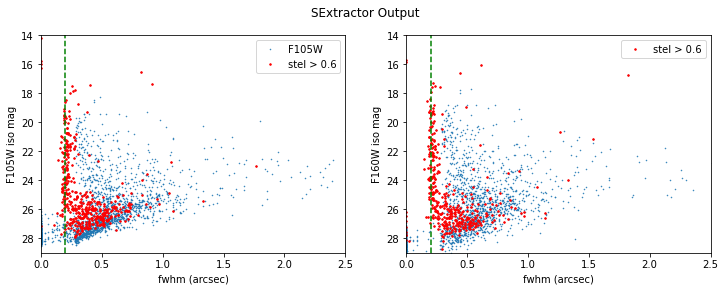

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))

pixel_scale = 0.06 #0.06arcsec/pixel

fig.suptitle('SExtractor Output')
pointsource1 = dat_0['cl']>0.6
ax[0].plot(dat_0['fwhm']*pixel_scale, dat_0['mag_iso'], 'o', ms=0.5, label='{}'.format(band[0]))
ax[0].plot(dat_0['fwhm'][pointsource1]*pixel_scale, dat_0['mag_iso'][pointsource1], 'o',color='red', ms=1.5, label='stel > 0.6')
ax[0].axvline(0.2, ls = '--', color='green')
ax[0].set_xlim([0, 2.5])
ax[0].set_ylim([29, 14])
ax[0].set_xlabel('fwhm (arcsec)')
ax[0].set_ylabel('{} iso mag'.format(band[0]))

pointsource2 = dat_1['cl']>0.6
ax[1].plot(dat_1['fwhm']*pixel_scale, dat_1['mag_iso'], 'o', ms=0.5, label=''.format(band[1]))
ax[1].plot(dat_1['fwhm'][pointsource2]*pixel_scale, dat_1['mag_iso'][pointsource2], 'o',color='red', ms=1.5, label='stel > 0.6')
ax[1].axvline(0.2, ls = '--', color='green')
ax[1].set_xlim([0, 2.5])
ax[1].set_ylim([29, 14])
ax[1].set_xlabel('fwhm (arcsec)')
ax[1].set_ylabel('{} iso mag'.format(band[1]))

lgnd0 = ax[0].legend()
lgnd1 = ax[1].legend()


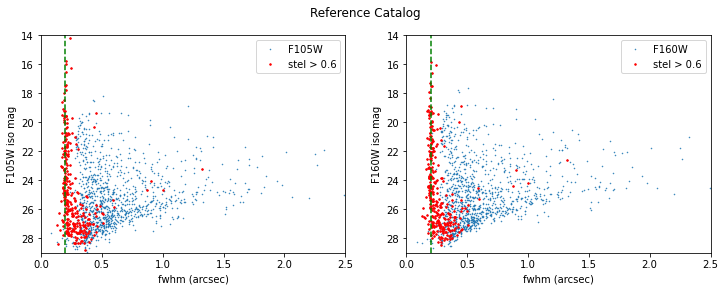

In [32]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))
fig.suptitle('Reference Catalog')
pointsource1 = dat_cat['stel']>0.6
ax[0].plot(dat_cat['fwhm'], dat_cat['{}_mag'.format(band_catread[0])], 'o', ms=0.5, label='{}'.format(band[0]))
ax[0].plot(dat_cat['fwhm'][pointsource1], dat_cat['{}_mag'.format(band_catread[0])][pointsource1], 'o',color='red', ms=1.5, label='stel > 0.6')
ax[0].axvline(0.2, ls = '--', color='green') #SExtractor 에서는 3pixel ~ 0.09 arcsec사용 
ax[0].set_xlim([0, 2.5])
ax[0].set_ylim([29, 14])
ax[0].set_xlabel('fwhm (arcsec)')
ax[0].set_ylabel('{} iso mag'.format(band[0]))

pointsource2 = dat_cat['stel']>0.6
ax[1].plot(dat_cat['fwhm'], dat_cat['{}_mag'.format(band_catread[1])], 'o', ms=0.5, label='{}'.format(band[1]))
ax[1].plot(dat_cat['fwhm'][pointsource2], dat_cat['{}_mag'.format(band_catread[1])][pointsource2], 'o',color='red', ms=1.5, label='stel > 0.6')
ax[1].axvline(0.2, ls = '--', color='green') #SExtractor 에서는 3pixel ~ 0.09 arcsec사용 
ax[1].set_xlim([0, 2.5])
ax[1].set_ylim([29, 14])
ax[1].set_xlabel('fwhm (arcsec)')
ax[1].set_ylabel('{} iso mag'.format(band[1]))

lgnd0 = ax[0].legend()
lgnd1 = ax[1].legend()


### (3) RA/DEC difference btw catalog and SExtractor ouput

(array([ 11.,  12.,  10.,  36.,  50.,  79., 147., 340., 257.,  98.,  74.,
         36.,  21.,  19.,  11.]),
 array([-2.66000000e-05, -2.32133333e-05, -1.98266667e-05, -1.64400000e-05,
        -1.30533333e-05, -9.66666667e-06, -6.28000000e-06, -2.89333333e-06,
         4.93333333e-07,  3.88000000e-06,  7.26666667e-06,  1.06533333e-05,
         1.40400000e-05,  1.74266667e-05,  2.08133333e-05,  2.42000000e-05]),
 <BarContainer object of 15 artists>)

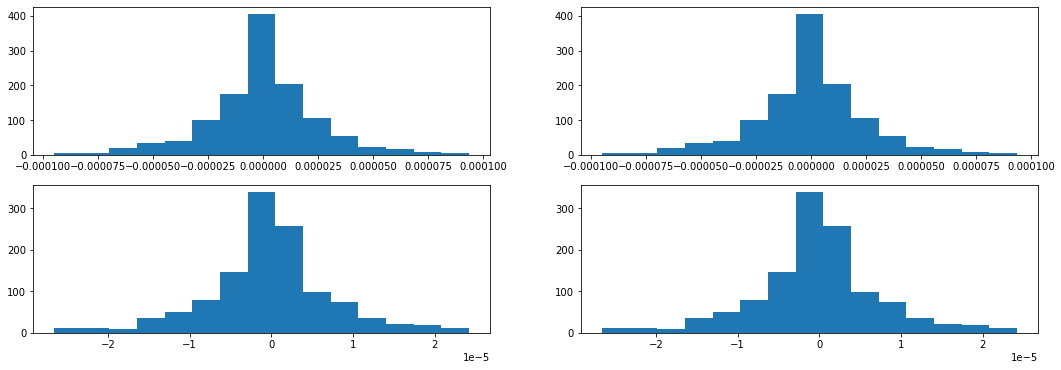

In [33]:
fig, ax = plt.subplots(2, 2, figsize=(18,6))
ax[0,0].hist(dat_0[idx_src]['ra']-dat_cat[idx_cat]['RA'], bins=15)
ax[0,1].hist(dat_1[idx_src]['ra']-dat_cat[idx_cat]['RA'], bins=15)
ax[1,0].hist(dat_0[idx_src]['dec']-dat_cat[idx_cat]['Dec'], bins=15)
ax[1,1].hist(dat_1[idx_src]['dec']-dat_cat[idx_cat]['Dec'], bins=15)
 

전부 0 또는 0과 비슷한 매우 비슷한 상수 중심의 narrowband에 정규분포인 것처럼 보이나..  dec은 종모양이 안나옴 문제가 있음 --> 이것도 pixel scale, 이랑 논문 input 값 비교 수정 후 개선


### (4) Catalog_unmatched property

In [34]:
notcatmatch = [] 
for i in range(np.size(dat_cat)):
    if i not in idx_cat:
        notcatmatch.append(i)
dat_cat_unmatched = dat_cat[notcatmatch]

print(np.size(dat_cat_unmatched))
print(np.size(dat_cat))
print(np.size(idx_cat))

274
1475
1201


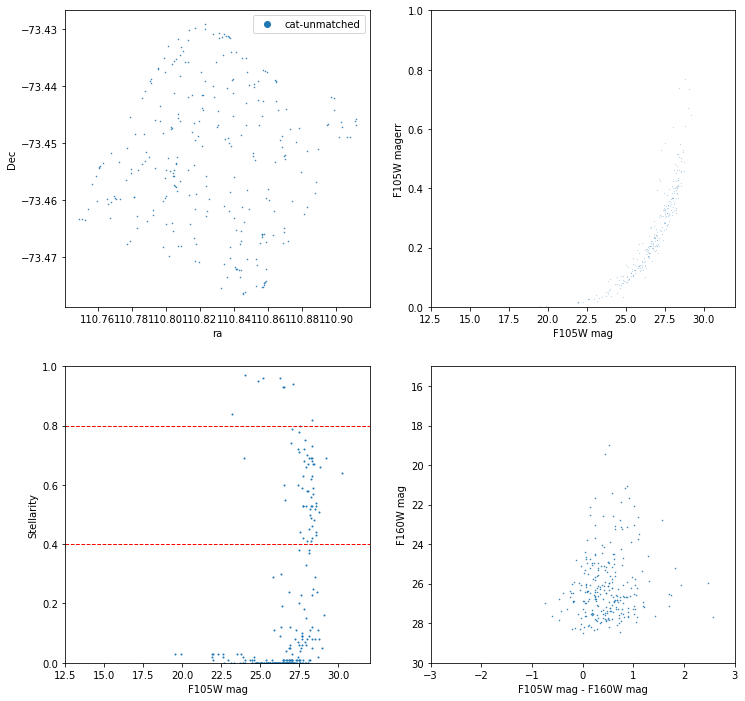

In [35]:
fig, ax = plt.subplots(2, 2, figsize=(12,12))
ax[0,0].plot(dat_cat_unmatched['RA'], dat_cat_unmatched['Dec'], 'o', ms = 0.5, label = 'cat-unmatched')
ax[0,0].set_xlabel("ra")
ax[0,0].set_ylabel("Dec")

ax[0,1].plot(dat_cat_unmatched['{}_mag'.format(band_catread[0])], dat_cat_unmatched['{}_magerr'.format(band_catread[0])], 'o', ms=0.1, label='SEx')
ax[0,1].set_xlim(12.5, 32)
ax[0,1].set_ylim(0, 1)
ax[0,1].set_xlabel('{} mag'.format(band[0]))
ax[0,1].set_ylabel('{} magerr'.format(band[0]))


ax[1,0].plot(dat_cat_unmatched['{}_mag'.format(band_catread[0])], dat_cat_unmatched['stel'], 'o', ms=1, label='cat')
ax[1,0].set_xlim([12.5, 32])
ax[1,0].set_ylim([0.0, 1.0])
ax[1,0].set_xlabel('{} mag'.format(band[0]))
ax[1,0].set_ylabel('Stellarity')
ax[1,0].axhline(0.4, 0, 1, color='red', ls='--', lw=1)
ax[1,0].axhline(0.8, 0, 1, color='red', ls='--', lw=1)

ax[1,1].plot(dat_cat_unmatched['{}_mag'.format(band_catread[0])]-dat_cat_unmatched['{}_mag'.format(band_catread[1])], dat_cat_unmatched['{}_mag'.format(band_catread[1])], 'o', ms=0.5, label='cat')
ax[1,1].set_xlabel('{} mag - {} mag'.format(band[0], band[1]))
ax[1,1].set_ylabel('{} mag'.format(band[1]))
ax[1,1].set_xlim([-3, 3])
ax[1,1].set_ylim([30, 15])
# change legend markersize
lgnd = ax[0,0].legend()
lgnd.legendHandles[0].set_markersize(6)
# lgnd.legendHandles[1].set_markersize(6)

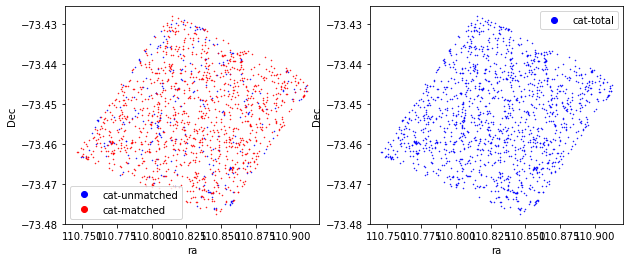

In [36]:
fig, ax = plt.subplots(1, 2, figsize=(10,4))
ax[0].plot(dat_cat_unmatched['RA'], dat_cat_unmatched['Dec'], 'o', ms = 0.5, label = 'cat-unmatched', color = 'blue')
ax[0].set_xlabel("ra")
ax[0].set_ylabel("Dec")

ax[0].plot(dat_cat[idx_cat]['RA'], dat_cat[idx_cat]['Dec'], 'o', ms = 0.5, label = 'cat-matched', color = 'red')
ax[0].set_xlabel("ra")
ax[0].set_ylabel("Dec")

ax[1].plot(dat_cat['RA'], dat_cat['Dec'], 'o', ms = 0.5, label = 'cat-total', color = 'blue')
ax[1].set_xlabel("ra")
ax[1].set_ylabel("Dec")


lgnd1 = ax[0].legend()
lgnd1.legendHandles[0].set_markersize(6)
lgnd1.legendHandles[1].set_markersize(6)
lgnd2 = ax[1].legend()
lgnd2.legendHandles[0].set_markersize(6)

### (5) SExtractor Output_unmatched property

In [37]:
notsexmatch = [] 
for i in range(np.size(dat_0)):
    if i not in idx_src:
        notsexmatch.append(i)
dat_0_unmatched = dat_0[notsexmatch]
dat_1_unmatched = dat_1[notsexmatch]
print(np.size(dat_0_unmatched))
print(np.size(dat_0))
print(np.size(idx_src))

1282
2483
1201


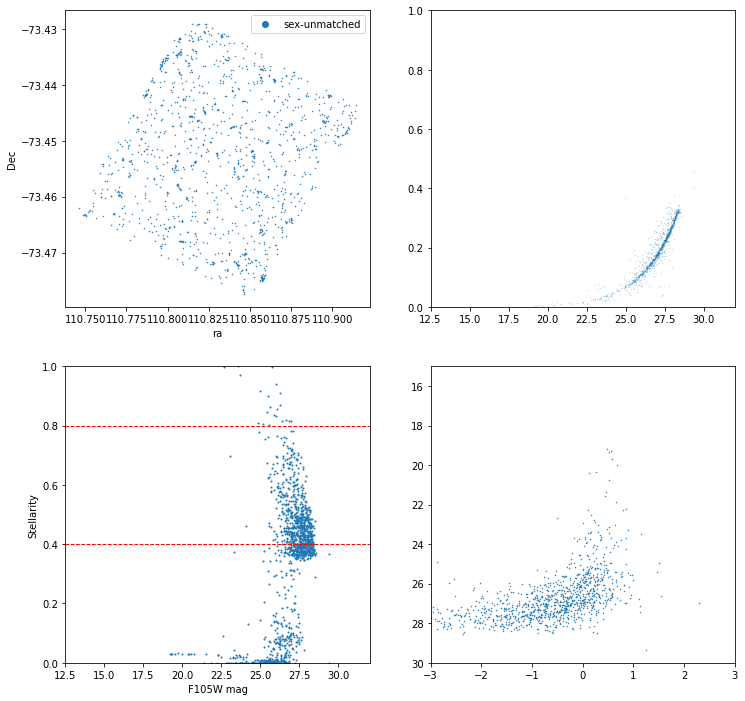

In [38]:
fig, ax = plt.subplots(2, 2, figsize=(12,12))
ax[0,0].plot(dat_0_unmatched['ra'], dat_0_unmatched['dec'], 'o', ms = 0.5, label = 'sex-unmatched')
ax[0,0].set_xlabel("ra")
ax[0,0].set_ylabel("Dec")

ax[0,1].plot(dat_0_unmatched['mag_iso'], dat_0_unmatched['magerr_iso'], 'o', ms=0.1, label='SEx')
ax[0,1].set_xlim(12.5, 32)
ax[0,1].set_ylim(0, 1)

ax[1,0].plot(dat_0_unmatched['mag_iso'], dat_0_unmatched['cl'], 'o', ms=1, label='sex')
ax[1,0].set_xlim([12.5, 32])
ax[1,0].set_ylim([0.0, 1.0])
ax[1,0].set_xlabel('{} mag'.format(band[0]))
ax[1,0].set_ylabel('Stellarity')
ax[1,0].axhline(0.4, 0, 1, color='red', ls='--', lw=1)
ax[1,0].axhline(0.8, 0, 1, color='red', ls='--', lw=1)

ax[1,1].plot(dat_0_unmatched['mag_iso']-dat_1_unmatched['mag_iso'], dat_0_unmatched['mag_iso'], 'o', ms=0.5, label='sex')
ax[1,1].set_xlim([-3, 3])
ax[1,1].set_ylim([30, 15])
# change legend markersize
lgnd = ax[0,0].legend()
lgnd.legendHandles[0].set_markersize(6)
# lgnd.legendHandles[1].set_markersize(6)

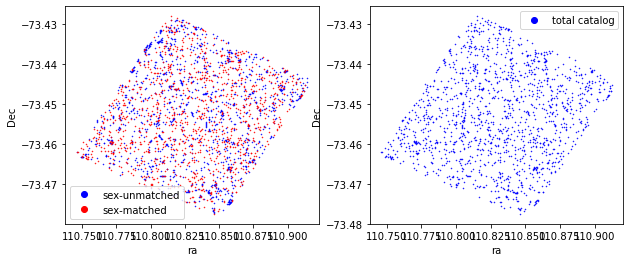

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(10,4))
ax[0].plot(dat_0_unmatched['ra'], dat_0_unmatched['dec'], 'o', ms = 0.5, label = 'sex-unmatched', color = 'blue')
ax[0].set_xlabel("ra")
ax[0].set_ylabel("Dec")

ax[0].plot(dat_0[idx_src]['ra'], dat_0[idx_src]['dec'], 'o', ms = 0.5, label = 'sex-matched', color = 'red')
ax[0].set_xlabel("ra")
ax[0].set_ylabel("Dec")

ax[1].plot(dat_cat['RA'], dat_cat['Dec'], 'o', ms = 0.5, label = 'total catalog', color = 'blue')
ax[1].set_xlabel("ra")
ax[1].set_ylabel("Dec")

lgnd1 = ax[0].legend()
lgnd1.legendHandles[0].set_markersize(6)
lgnd1.legendHandles[1].set_markersize(6)
lgnd2 = ax[1].legend()
lgnd2.legendHandles[0].set_markersize(6)
